In [1]:
#
# Create a classifier for artistic painting matching
# 
# TRANSFER LEARNING Inception V3
# with DATA AUGMENTATION and DROPOUT
# Evaluate the model with any other image, the classifier will tell the to which artists the 
# input art is more similar
# Conclusion
# Author: Luis A. Mateos

# pip install tensorflow-datasets
# pip install tensorflow --upgrade
# pip install scipy

import os
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

import os
path_base = os.getcwd()
#'\home\\github\ml-classifier-no-common-sense\\'
path_dir = os.path.join(path_base+'/artists/')

'''artists = ["Sandro_Botticelli","Jacques-Louis_David","Leonardo_Da_Vinci",
          "Eugene_Delacroix","Jean-Honore_Fragonard","Jean_Auguste_Dominique_Ingres",
          "Gustav_Klimt","Michelangelo","Claude_Monet",
          "Edvard_Munch","Rembrandt","Pierre-Auguste_Renoir",
          "Jan_van_Eyck","Vincent_Van_Gogh","Diego_Velazquez",
          "Johannes_Vermeer"]
'''

artists = []
folders = os.listdir(path_dir)
artists = folders
print(folders)
print(len(folders))

train_folders = []

for i in folders:
    train_folders.append(path_dir + i + '/')
    
train_folder_files = [[]]
# initilize array
train_folder_files[0] = os.listdir(train_folders[0])

# fill array with list of files from each folder
for i in range(1,len(train_folders)):
    train_folder_files.append(os.listdir(train_folders[i]))
    
for i in range(len(train_folders)):
    # print directories with training images
    print(train_folders[i])
    # print filename from each directory
    print(train_folder_files[i][0])
    print(train_folder_files[i][1])
    # print total training images
    print("Total training zero images= ", len(os.listdir(train_folders[i])))
    print("----------------------------")
    if i == 2:
        break

num_classes = len(train_folders)

['Albrecht_Altdorfer', 'Alexandre_Cabanel', 'Amedeo_Modigliani', 'Antoine_Watteau', 'Camille_Pissarro', 'Caravaggio', 'Caspar_David_Friedrich', 'Cassius_Marcellus_Coolidge', 'Childe_Hassam', 'Claude_Monet', 'Diego_Velazquez', 'Edgar_Degas', 'Edouard_Manet', 'Edvard_Munch', 'El_Greco', 'Francisco_Goya', 'Francois_Boucher', 'Franz_Marc', 'Gilbert_Stuart', 'Grant_Wood', 'Gustav_Klimt', 'Hubert_Robert', 'Ivan_Aivazovsky', 'Jacques-Louis_David', 'Jean-Francois_Millet', 'Johannes_Vermeer', 'John_Constable', 'Joseph_Mallord_William_Turner', 'Katsushika_Hokusai', 'Leonardo_Da_Vinci', 'Mary_Cassatt', 'Michelangelo', 'Paul_Cezanne', 'Paul_Klee', 'Pierre-Auguste_Renoir', 'Pieter_Bruegel_The_Elder', 'Raphael', 'Rembrandt', 'Sandro_Botticelli', 'Thomas_Gainsborough', 'Vincent_Van_Gogh', 'Wassily_Kandinsky', 'Wladyslaw_Podkowinski']
43
C:\Users\Josh\Documents\AIartist/artists/Albrecht_Altdorfer/
ascension-christ.jpg!Large.jpg
Battle_Of_Issus_by_Albrecht_Altdorfer_E1.jpg
Total training zero images=  

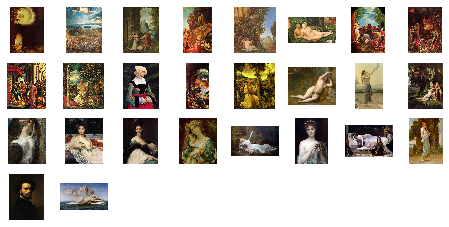

In [2]:
#
# Visualize some of the training images
#
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg   

nrows, ncols = 8,8
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*1, nrows*1)

pic_index += 16
next_zero_pix = [os.path.join(train_folders[0], fname)
                for fname in train_folder_files[0][pic_index-16:pic_index]]
next_one_pix = [os.path.join(train_folders[1], fname)
                for fname in train_folder_files[1][pic_index-16:pic_index]]

for i, img_path in enumerate(next_zero_pix + next_one_pix):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('off')
    
    img = mpimg.imread(img_path)
    #R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
    #imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
    #plt.imshow(imgGray, cmap='gray')
    
    plt.imshow(img, cmap='gray')
    
plt.show()

In [3]:
#
# Transfer learning
#
import tensorflow as tf
print(tf.__version__)

import urllib.request

from tensorflow.keras.applications.inception_v3 import InceptionV3

weights_url = "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
weights_file = "inception_v3.h5"
urllib.request.urlretrieve(weights_url, weights_file)

pre_trained_model = InceptionV3(input_shape=(150, 150, 3),
                               include_top=False,
                               weights=None)

pre_trained_model.load_weights(weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False
    
pre_trained_model.summary()

2.5.0
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_________________________________________________________________________________

__________________________________________________________________________________________________
mixed0 (Concatenate)            (None, 16, 16, 256)  0           activation_5[0][0]               
                                                                 activation_7[0][0]               
                                                                 activation_10[0][0]              
                                                                 activation_11[0][0]              
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 16, 16, 64)   16384       mixed0[0][0]                     
__________________________________________________________________________________________________
batch_normalization_15 (BatchNo (None, 16, 16, 64)   192         conv2d_15[0][0]                  
__________________________________________________________________________________________________
activation

__________________________________________________________________________________________________
batch_normalization_19 (BatchNo (None, 16, 16, 64)   192         conv2d_19[0][0]                  
__________________________________________________________________________________________________
batch_normalization_21 (BatchNo (None, 16, 16, 64)   192         conv2d_21[0][0]                  
__________________________________________________________________________________________________
batch_normalization_24 (BatchNo (None, 16, 16, 96)   288         conv2d_24[0][0]                  
__________________________________________________________________________________________________
batch_normalization_25 (BatchNo (None, 16, 16, 64)   192         conv2d_25[0][0]                  
__________________________________________________________________________________________________
activation_19 (Activation)      (None, 16, 16, 64)   0           batch_normalization_19[0][0]     
__________

batch_normalization_37 (BatchNo (None, 7, 7, 128)    384         conv2d_37[0][0]                  
__________________________________________________________________________________________________
activation_32 (Activation)      (None, 7, 7, 128)    0           batch_normalization_32[0][0]     
__________________________________________________________________________________________________
activation_37 (Activation)      (None, 7, 7, 128)    0           batch_normalization_37[0][0]     
__________________________________________________________________________________________________
average_pooling2d_3 (AveragePoo (None, 7, 7, 768)    0           mixed3[0][0]                     
__________________________________________________________________________________________________
conv2d_30 (Conv2D)              (None, 7, 7, 192)    147456      mixed3[0][0]                     
__________________________________________________________________________________________________
conv2d_33 

__________________________________________________________________________________________________
batch_normalization_40 (BatchNo (None, 7, 7, 192)    576         conv2d_40[0][0]                  
__________________________________________________________________________________________________
batch_normalization_43 (BatchNo (None, 7, 7, 192)    576         conv2d_43[0][0]                  
__________________________________________________________________________________________________
batch_normalization_48 (BatchNo (None, 7, 7, 192)    576         conv2d_48[0][0]                  
__________________________________________________________________________________________________
batch_normalization_49 (BatchNo (None, 7, 7, 192)    576         conv2d_49[0][0]                  
__________________________________________________________________________________________________
activation_40 (Activation)      (None, 7, 7, 192)    0           batch_normalization_40[0][0]     
__________

activation_59 (Activation)      (None, 7, 7, 192)    0           batch_normalization_59[0][0]     
__________________________________________________________________________________________________
mixed6 (Concatenate)            (None, 7, 7, 768)    0           activation_50[0][0]              
                                                                 activation_53[0][0]              
                                                                 activation_58[0][0]              
                                                                 activation_59[0][0]              
__________________________________________________________________________________________________
conv2d_64 (Conv2D)              (None, 7, 7, 192)    147456      mixed6[0][0]                     
__________________________________________________________________________________________________
batch_normalization_64 (BatchNo (None, 7, 7, 192)    576         conv2d_64[0][0]                  
__________

batch_normalization_73 (BatchNo (None, 7, 7, 192)    576         conv2d_73[0][0]                  
__________________________________________________________________________________________________
activation_73 (Activation)      (None, 7, 7, 192)    0           batch_normalization_73[0][0]     
__________________________________________________________________________________________________
conv2d_70 (Conv2D)              (None, 7, 7, 192)    147456      mixed7[0][0]                     
__________________________________________________________________________________________________
conv2d_74 (Conv2D)              (None, 7, 7, 192)    258048      activation_73[0][0]              
__________________________________________________________________________________________________
batch_normalization_70 (BatchNo (None, 7, 7, 192)    576         conv2d_70[0][0]                  
__________________________________________________________________________________________________
batch_norm

activation_83 (Activation)      (None, 3, 3, 384)    0           batch_normalization_83[0][0]     
__________________________________________________________________________________________________
batch_normalization_84 (BatchNo (None, 3, 3, 192)    576         conv2d_84[0][0]                  
__________________________________________________________________________________________________
activation_76 (Activation)      (None, 3, 3, 320)    0           batch_normalization_76[0][0]     
__________________________________________________________________________________________________
mixed9_0 (Concatenate)          (None, 3, 3, 768)    0           activation_78[0][0]              
                                                                 activation_79[0][0]              
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 3, 3, 768)    0           activation_82[0][0]              
          

                                                                 mixed9_1[0][0]                   
                                                                 concatenate_1[0][0]              
                                                                 activation_93[0][0]              
Total params: 21,802,784
Trainable params: 0
Non-trainable params: 21,802,784
__________________________________________________________________________________________________


In [4]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [5]:
#
# TRANSFER LEARNING
#

x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(pre_trained_model.input, x)

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy']
             )

In [6]:
# DATA AUGMENTATION withOUT NORMALIZATION 
#We use this visualizer for displaying the data augmentation only
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_visualizer = ImageDataGenerator(
      #rescale=1./255,
      rotation_range=33,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator_visualizer = train_datagen_visualizer.flow_from_directory(path_base+'/artists/',
                                                    target_size=(150,150),#(28,28),
                                                    batch_size=64,
                                                    class_mode='binary')
#class_mode='categorical')

Found 1157 images belonging to 43 classes.


<class 'tuple'>
<class 'numpy.ndarray'>
(64, 150, 150, 3)


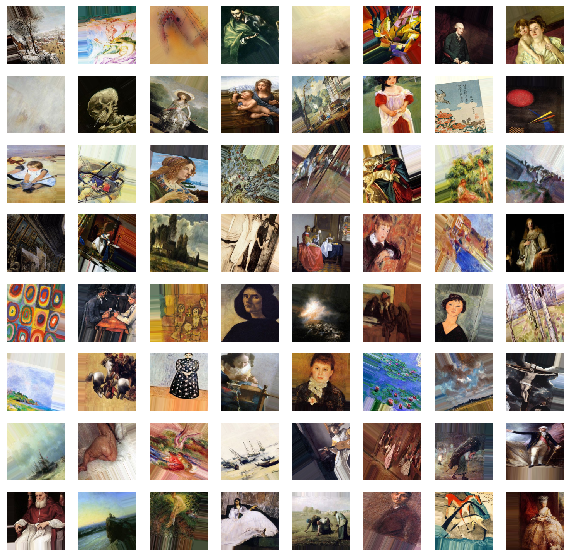

In [7]:
import matplotlib.pyplot as plt
import numpy as np

#plt.figure(figsize=(10, 10))
for image in train_generator_visualizer:
    print(type(image))
    print(type(image[0]))
    print(image[0].shape)
#    plt.imshow(image[0].astype("uint8"))
    break
    
plt.figure(figsize=(10, 10))
for images, labels in train_generator_visualizer:#.take(1):
    for i in range(64):
        ax = plt.subplot(8, 8, i + 1)
        plt.imshow(images[i].astype("uint8"))
        plt.axis("off")
    break

In [8]:
# Re RUN DATA AUGMENTATION with NORMALIZATION 
#(IF displaying the images will look all black from values between 0 to 1)

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=33,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(path_base+'/artists/',
                                                    target_size=(150,150),#(28,28),
                                                    batch_size=64,
                                                    class_mode='categorical')

Found 1157 images belonging to 43 classes.


In [9]:
history = model.fit(train_generator,
                   steps_per_epoch=8,
                   epochs=500,
                   verbose=2)

Epoch 1/500
8/8 - 11s - loss: 3.8113 - accuracy: 0.0723
Epoch 2/500
8/8 - 9s - loss: 3.3344 - accuracy: 0.1543
Epoch 3/500
8/8 - 10s - loss: 3.0289 - accuracy: 0.2119
Epoch 4/500
8/8 - 7s - loss: 2.9442 - accuracy: 0.2230
Epoch 5/500
8/8 - 8s - loss: 2.8798 - accuracy: 0.2539
Epoch 6/500
8/8 - 11s - loss: 2.8036 - accuracy: 0.2715
Epoch 7/500
8/8 - 9s - loss: 2.6288 - accuracy: 0.3066
Epoch 8/500
8/8 - 8s - loss: 2.5182 - accuracy: 0.3400
Epoch 9/500
8/8 - 9s - loss: 2.3817 - accuracy: 0.3398
Epoch 10/500
8/8 - 9s - loss: 2.2866 - accuracy: 0.3687
Epoch 11/500
8/8 - 7s - loss: 2.3479 - accuracy: 0.3642
Epoch 12/500
8/8 - 13s - loss: 2.2433 - accuracy: 0.3770
Epoch 13/500
8/8 - 10s - loss: 2.3522 - accuracy: 0.3438
Epoch 14/500
8/8 - 8s - loss: 2.1141 - accuracy: 0.4106
Epoch 15/500
8/8 - 9s - loss: 2.1854 - accuracy: 0.4199
Epoch 16/500
8/8 - 9s - loss: 2.0723 - accuracy: 0.4414
Epoch 17/500
8/8 - 9s - loss: 2.0096 - accuracy: 0.4746
Epoch 18/500
8/8 - 9s - loss: 1.9052 - accuracy: 0.4

Epoch 146/500
8/8 - 15s - loss: 0.6527 - accuracy: 0.8105
Epoch 147/500
8/8 - 14s - loss: 0.6593 - accuracy: 0.8125
Epoch 148/500
8/8 - 14s - loss: 0.5971 - accuracy: 0.7910
Epoch 149/500
8/8 - 12s - loss: 0.6484 - accuracy: 0.7881
Epoch 150/500
8/8 - 13s - loss: 0.7079 - accuracy: 0.7930
Epoch 151/500
8/8 - 11s - loss: 0.6353 - accuracy: 0.8013
Epoch 152/500
8/8 - 14s - loss: 0.6548 - accuracy: 0.7891
Epoch 153/500
8/8 - 13s - loss: 0.6074 - accuracy: 0.7930
Epoch 154/500
8/8 - 11s - loss: 0.6824 - accuracy: 0.7859
Epoch 155/500
8/8 - 11s - loss: 0.7148 - accuracy: 0.7852
Epoch 156/500
8/8 - 12s - loss: 0.6653 - accuracy: 0.7773
Epoch 157/500
8/8 - 12s - loss: 0.5691 - accuracy: 0.8281
Epoch 158/500
8/8 - 14s - loss: 0.7293 - accuracy: 0.7930
Epoch 159/500
8/8 - 13s - loss: 0.6229 - accuracy: 0.8027
Epoch 160/500
8/8 - 13s - loss: 0.5054 - accuracy: 0.8438
Epoch 161/500
8/8 - 13s - loss: 0.5288 - accuracy: 0.8301
Epoch 162/500
8/8 - 13s - loss: 0.5942 - accuracy: 0.8008
Epoch 163/500


Epoch 288/500
8/8 - 10s - loss: 0.4881 - accuracy: 0.8455
Epoch 289/500
8/8 - 10s - loss: 0.4941 - accuracy: 0.8438
Epoch 290/500
8/8 - 10s - loss: 0.4311 - accuracy: 0.8691
Epoch 291/500
8/8 - 9s - loss: 0.4502 - accuracy: 0.8499
Epoch 292/500
8/8 - 8s - loss: 0.4706 - accuracy: 0.8613
Epoch 293/500
8/8 - 8s - loss: 0.4763 - accuracy: 0.8496
Epoch 294/500
8/8 - 8s - loss: 0.4884 - accuracy: 0.8379
Epoch 295/500
8/8 - 8s - loss: 0.3656 - accuracy: 0.8633
Epoch 296/500
8/8 - 8s - loss: 0.4342 - accuracy: 0.8653
Epoch 297/500
8/8 - 8s - loss: 0.4444 - accuracy: 0.8653
Epoch 298/500
8/8 - 7s - loss: 0.4914 - accuracy: 0.8212
Epoch 299/500
8/8 - 8s - loss: 0.5355 - accuracy: 0.8262
Epoch 300/500
8/8 - 7s - loss: 0.4518 - accuracy: 0.8675
Epoch 301/500
8/8 - 8s - loss: 0.5225 - accuracy: 0.8262
Epoch 302/500
8/8 - 8s - loss: 0.4732 - accuracy: 0.8496
Epoch 303/500
8/8 - 8s - loss: 0.4705 - accuracy: 0.8613
Epoch 304/500
8/8 - 7s - loss: 0.3935 - accuracy: 0.8874
Epoch 305/500
8/8 - 8s - los

Epoch 432/500
8/8 - 7s - loss: 0.2728 - accuracy: 0.9205
Epoch 433/500
8/8 - 7s - loss: 0.3750 - accuracy: 0.8896
Epoch 434/500
8/8 - 8s - loss: 0.4953 - accuracy: 0.8379
Epoch 435/500
8/8 - 8s - loss: 0.4588 - accuracy: 0.8613
Epoch 436/500
8/8 - 8s - loss: 0.4273 - accuracy: 0.8672
Epoch 437/500
8/8 - 7s - loss: 0.3205 - accuracy: 0.9007
Epoch 438/500
8/8 - 8s - loss: 0.3478 - accuracy: 0.8867
Epoch 439/500
8/8 - 8s - loss: 0.3888 - accuracy: 0.8789
Epoch 440/500
8/8 - 8s - loss: 0.2783 - accuracy: 0.8965
Epoch 441/500
8/8 - 8s - loss: 0.3557 - accuracy: 0.8848
Epoch 442/500
8/8 - 8s - loss: 0.2826 - accuracy: 0.9062
Epoch 443/500
8/8 - 8s - loss: 0.3926 - accuracy: 0.8809
Epoch 444/500
8/8 - 8s - loss: 0.3704 - accuracy: 0.8945
Epoch 445/500
8/8 - 8s - loss: 0.3050 - accuracy: 0.8984
Epoch 446/500
8/8 - 7s - loss: 0.3489 - accuracy: 0.9007
Epoch 447/500
8/8 - 8s - loss: 0.3200 - accuracy: 0.8926
Epoch 448/500
8/8 - 8s - loss: 0.3677 - accuracy: 0.8887
Epoch 449/500
8/8 - 8s - loss: 

In [10]:
#
# Helper functions for plotting
#
import numpy as np
import os
import matplotlib.image as mpimg

import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.preprocessing import image


Your piece of art has a touch of Wassily_Kandinsky, style of Paul_Klee and similar to Franz_Marc


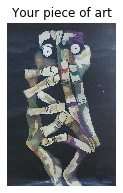

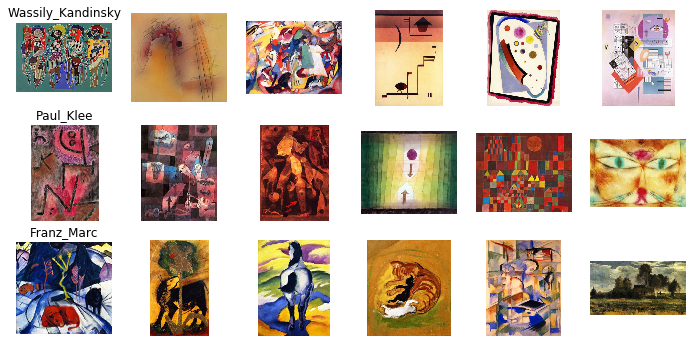

In [17]:
#
# 
#
path_dir = os.path.join(path_base+'/')
path_dir2 = os.path.join(path_base+'/artists2/')
#path = train_folders[0] + train_folder_files[0][0] 
path = path_dir2 + "Cottage_With_Peasant_Woman_Digging_by_Vincent_Van_Gogh_V77.jpg" 
path = path_dir2 + "Entrance_To_A_Quarry_by_Vincent_Van_Gogh_H54.jpg" 
path = path_dir2 + "Farmhouse_In_A_Wheat_Field_by_Vincent_Van_Gogh_Q33.jpg" 
path = path_dir2 + "Portrait_Of_The_Artists_Mother_by_Vincent_Van_Gogh_V43.jpg" 
path = path_dir2 + "Heath_With_Wheelbarrows_by_Vincent_Van_Gogh_L84.jpg" #
path = path_dir + "20200911_204901.jpg" 
path = path_dir + "20200911_210346.jpg" 
path = path_dir + "20220903_162317.jpg" 
path = path_dir + "20220903_162609.jpg" 
#path = path_dir + "20220903_162245.jpg" 


img = mpimg.imread(path)
plt.axis("off")
plt.gca().set_title('Your piece of art')
plt.imshow(img)

img = image.load_img(path, target_size=(150,150))
x = image.img_to_array(img)
x = x/255.0
#print(x.shape)
x = np.expand_dims(x, axis=0)
#print(x.shape)

classes = model.predict(x)

#print(classes[0])
#print(max(classes[0]))
#i=0
#for x in classes[0]:
#    if max(classes[0]) == x:
#        print(artists[i])
#        print(i)
#        break
#    i+=1
    
d=dict()
i=0
for x in classes[0]:
    d.setdefault(x,i)
    i+=1
    
#print(d)

art = []
arti=[]
i=0
for k, v in sorted(d.items(),reverse=True):
    #print('---------', k, 'in', v)
    #print(artists[v])
    art.append(artists[v])
    arti.append(v)
    i+=1
    if i>3:
        break
        
print(f"Your piece of art has a touch of {art[0]}, style of {art[1]} and similar to {art[2]}")

nrows, ncols = 3,6
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*1, nrows*1)

pic_index += 6
next_zero_pix = [os.path.join(train_folders[arti[0]], fname)
                for fname in train_folder_files[arti[0]][pic_index-6:pic_index]]
next_one_pix = [os.path.join(train_folders[arti[1]], fname)
                for fname in train_folder_files[arti[1]][pic_index-6:pic_index]]
next_two_pix = [os.path.join(train_folders[arti[2]], fname)
                for fname in train_folder_files[arti[2]][pic_index-6:pic_index]]


plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)
plt.gca().set_title('title')
ax1.title.set_text('First Plot')
ax2.title.set_text('2First Plot')
ax3.title.set_text('3First Plot')
ax4.title.set_text('4 Plot')

axes = [ax1, ax2, ax3, ax4]

for i, img_path in enumerate(next_zero_pix + next_one_pix + next_two_pix):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('off')
    if i==0:
        plt.gca().set_title(art[0])
    if i==6:
        plt.gca().set_title(art[1])
    if i==12:
        plt.gca().set_title(art[2])
        
    img = mpimg.imread(img_path)
    #R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
    #imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
    #plt.imshow(imgGray, cmap='gray')
    
    plt.imshow(img, cmap='gray')

plt.show()

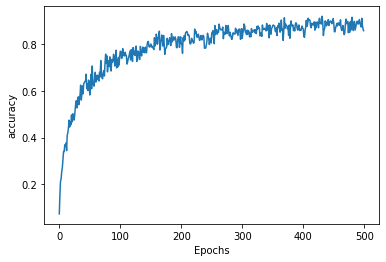

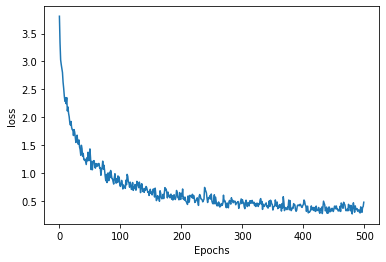

In [12]:
# Visualize the results
# overfit because validation accuracy is slowly dropping while training accuracy is growing
import matplotlib.pyplot as plt
%matplotlib inline

def plot_graphs(history, string):
    plt.plot(history.history[string])
    #plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    #plt.legend([string, 'val_'+string])
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [18]:
model.save('aiartist.h5')

In [19]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\Josh\AppData\Local\Temp\tmp4ro8i0vx\assets


In [ ]:
import pathlib

tflite_model_file = pathlib.Path('aiartist.tflite')
tflite_model_file.write_bytes(tflite_model)

In [20]:
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

In [21]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [22]:
print(input_details)

[{'name': 'input_1', 'index': 0, 'shape': array([  1, 150, 150,   3]), 'shape_signature': array([ -1, 150, 150,   3]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [23]:
print(output_details)

[{'name': 'Identity', 'index': 237, 'shape': array([ 1, 43]), 'shape_signature': array([-1, 43]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
